# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key


#Installing citipy module
!pip install citipy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
city_weather_request_url = url + "&q=" + city
print(city_weather_request_url)
    
response = requests.get(city_weather_request_url)


http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=da448a4f49287bb23db279e67619309b&q=atuona


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
city_df = pd.read_csv('cities.csv')
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

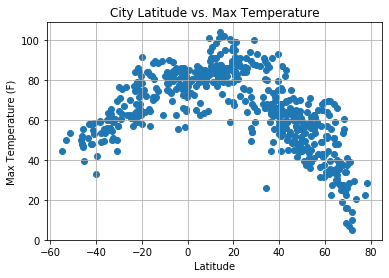

In [23]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

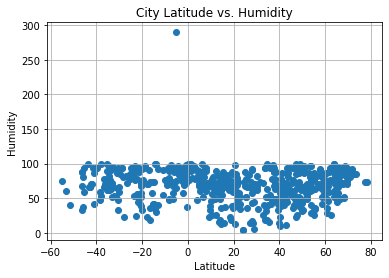

In [28]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

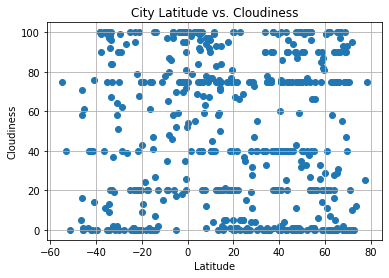

In [27]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

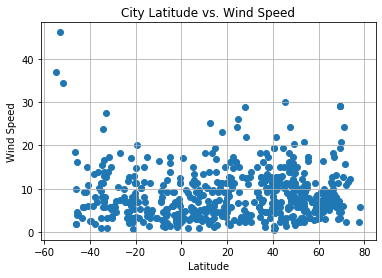

In [29]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [61]:
# OPTIONAL: Create a function to create Linear Regression plots
# Make a function that accepts a list of x values and y values, a description for the x and y axes,
# a string that describes which hemisphere is being analyzed and a filename to use while saving the figure
# and finally the x,y coordinates to create the annotation of the equation on the graph
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"fig{ifig}.png")
    plt.show()

In [57]:
nothern = city_df.loc[city_df["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = city_df.loc[city_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810829


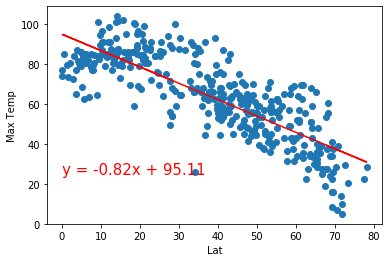

In [62]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7602633550516462


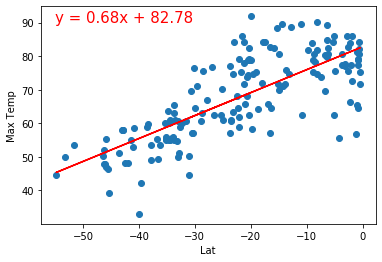

In [63]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)
#plt.savefig("SouthernHemi_MaxTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746496


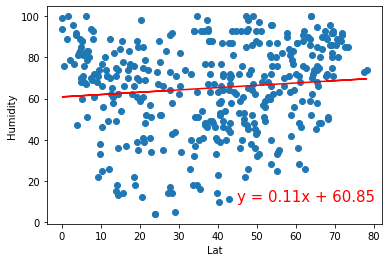

In [64]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)
#plt.savefig("NorthernHemi_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583074


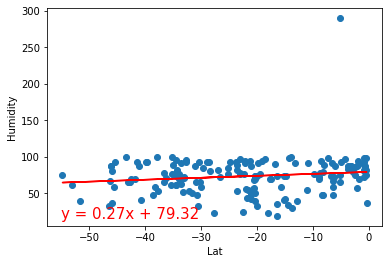

In [65]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)
#plt.savefig("SouthernHemi_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


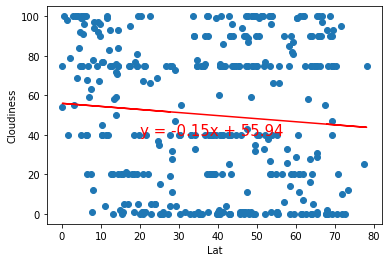

In [66]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)
#plt.savefig("NorthernHemi_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991604


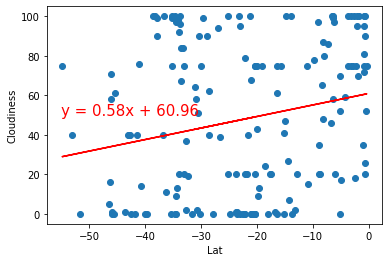

In [67]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)
#plt.savefig("SouthernHemi_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10713827743884798


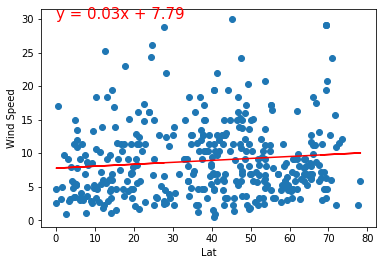

In [68]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)
#plt.savefig("NotthernHemi_WindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3224830771395381


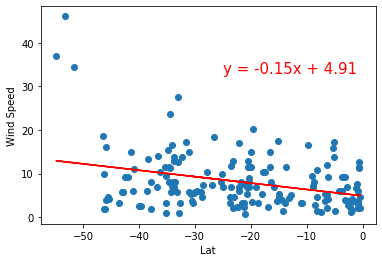

In [69]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)
#plt.savefig("SouthernHemi_WindSpeed.png")